In [1]:
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 239 * pt
aspect_ratio = (1 + 5 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='paper', rc={'axes.facecolor': 'white', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})
# sns.set_theme(style='whitegrid', context='paper', rc={'savefig.transparent': 'true', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})
colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92", "#e27ea6", "#f9e300", "#62361b"]
anon_name = "Midway"

In [7]:
df = pd.read_csv("../outputs/set_of_endpoints_1_meggie_and_emmy_count_from_database_credit.csv")
df.columns = df.columns.str.replace(' ', '')
df = df.sort_values(by='Job_end_time')
user_map = ["Greedy", "Energy", "EFT", "Unknown", "Unknown", "Theta", anon_name, "FASTER", "Mixed", "Runtime"]
df["user_name"] = df["User_id"].apply(lambda uid : user_map[uid])
df = df[df["user_name"] != "Unknown"]
df

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,user_name
495,11,46,1,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Energy
460,10,46,0,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Greedy
496,11,46,1,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Energy
461,10,46,0,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Greedy
497,11,46,1,1,35.786002,3.998886e+08,2.208000e+02,21.278671,5.233778,1.472000e+02,250.410035,256,14.756712,Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423711,32655,142364,5,0,1562.244346,-1.549771e+09,2.160513e+10,1305.977869,451.103460,2.160512e+10,3546.851818,160,688.900779,Theta
1423770,32665,142376,5,0,169435.982346,-1.549940e+09,2.160545e+10,146322.653051,57317.004395,2.160513e+10,112360.242949,640,76979.862690,Theta
1423771,32665,142376,5,0,169435.982346,-1.550110e+09,2.160577e+10,146322.653051,57317.004395,2.160545e+10,112360.242949,640,76979.862690,Theta
1423790,32675,142378,5,0,30810.817971,-1.550140e+09,2.160592e+10,26607.413182,10422.838403,2.160577e+10,50768.496818,256,13998.088747,Theta


In [8]:
df["credits_consumed"] = df.groupby(["user_name"])["Credit_lost"].cumsum()
df["jobs_completed"] = df.groupby(["user_name"])["Credit_lost"].cumcount() / 1000
df["job_end_time_hours"] = df["Job_end_time"] / (60 * 60)
data = df[df["New_credit"] >= 0]
data

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,user_name,credits_consumed,jobs_completed,job_end_time_hours
495,11,46,1,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Energy,3.578600e+01,0.000,2.044444e-02
460,10,46,0,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Greedy,3.578600e+01,0.000,2.044444e-02
496,11,46,1,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Energy,7.157200e+01,0.001,4.088889e-02
461,10,46,0,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Greedy,7.157200e+01,0.001,4.088889e-02
497,11,46,1,1,35.786002,3.998886e+08,2.208000e+02,21.278671,5.233778,1.472000e+02,250.410035,256,14.756712,Energy,1.073580e+02,0.002,6.133333e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295898,15425,29565,5,0,24942.247071,1.112004e+05,4.345044e+09,20857.013926,7200.615247,4.344882e+09,56093.430626,160,11001.761334,Theta,3.998888e+08,29.593,1.206957e+06
295899,15425,29565,5,0,24942.247071,8.625817e+04,4.345206e+09,20857.013926,7200.615247,4.345044e+09,56093.430626,160,11001.761334,Theta,3.999137e+08,29.594,1.207002e+06
295900,15425,29565,5,0,24942.247071,6.131592e+04,4.345368e+09,20857.013926,7200.615247,4.345206e+09,56093.430626,160,11001.761334,Theta,3.999387e+08,29.595,1.207047e+06
295901,15425,29565,5,0,24942.247071,3.637368e+04,4.345530e+09,20857.013926,7200.615247,4.345368e+09,56093.430626,160,11001.761334,Theta,3.999636e+08,29.596,1.207092e+06


In [9]:
data

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,user_name,credits_consumed,jobs_completed,job_end_time_hours
495,11,46,1,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Energy,3.578600e+01,0.000,2.044444e-02
460,10,46,0,1,35.786002,3.998886e+08,7.360000e+01,21.278671,5.233778,0.000000e+00,250.410035,256,14.756712,Greedy,3.578600e+01,0.000,2.044444e-02
496,11,46,1,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Energy,7.157200e+01,0.001,4.088889e-02
461,10,46,0,1,35.786002,3.998886e+08,1.472000e+02,21.278671,5.233778,7.360000e+01,250.410035,256,14.756712,Greedy,7.157200e+01,0.001,4.088889e-02
497,11,46,1,1,35.786002,3.998886e+08,2.208000e+02,21.278671,5.233778,1.472000e+02,250.410035,256,14.756712,Energy,1.073580e+02,0.002,6.133333e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295898,15425,29565,5,0,24942.247071,1.112004e+05,4.345044e+09,20857.013926,7200.615247,4.344882e+09,56093.430626,160,11001.761334,Theta,3.998888e+08,29.593,1.206957e+06
295899,15425,29565,5,0,24942.247071,8.625817e+04,4.345206e+09,20857.013926,7200.615247,4.345044e+09,56093.430626,160,11001.761334,Theta,3.999137e+08,29.594,1.207002e+06
295900,15425,29565,5,0,24942.247071,6.131592e+04,4.345368e+09,20857.013926,7200.615247,4.345206e+09,56093.430626,160,11001.761334,Theta,3.999387e+08,29.595,1.207047e+06
295901,15425,29565,5,0,24942.247071,3.637368e+04,4.345530e+09,20857.013926,7200.615247,4.345368e+09,56093.430626,160,11001.761334,Theta,3.999636e+08,29.596,1.207092e+06


/tmp/ipykernel_873/484562505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)


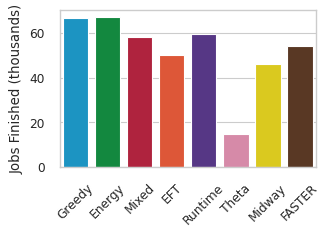

In [10]:
fig, ax = plt.subplots()
sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (thousands)")
ax.tick_params(axis='x', labelrotation=45)
plt.savefig("sim_jobs_completed.pdf")
plt.savefig("sim_jobs_completed_talk.png")

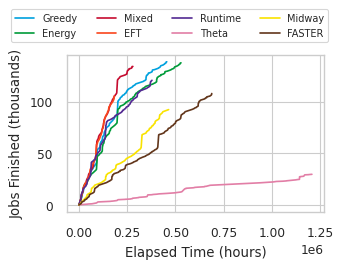

In [11]:
fig, ax = plt.subplots()
sns.lineplot(data=data, x="job_end_time_hours", y="jobs_completed", hue="user_name", hue_order=['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, ax=ax)
ax.set_xlabel("Elapsed Time (hours)")
ax.set_ylabel("Jobs Finished (thousands)")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.4, 1.05), ncol=4, title=None, fontsize=7)
plt.savefig("sim_jobs_vs_time_eba.pdf")
plt.savefig("sim_jobs_vs_time_eba_talk.png")

/tmp/ipykernel_873/376610838.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


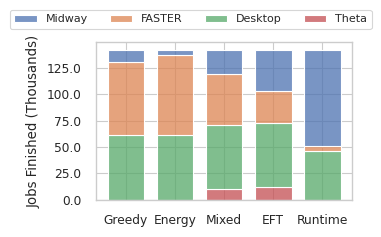

In [12]:
endpoint_map = ["Theta", anon_name, "Desktop", "FASTER"]
df["endpoint_name"] = df["Selected_endpoint"].apply(lambda eid : endpoint_map[eid])
data = df[df["user_name"] != "Theta"]
data = data[data["user_name"] != "FASTER"]
data = data[data["user_name"] != anon_name]
data['user_name'] = pd.Categorical(data['user_name'], ['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'])

fig, ax = plt.subplots()
sns.histplot(data, x="user_name", hue="endpoint_name", multiple="stack", shrink=0.75, ax=ax)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.37, 1.05), ncol=4, title=None, fontsize=8)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (Thousands)")
labels = np.array([int(l.get_text()) for l in ax.get_yticklabels()]) / 1000
ax.set_yticklabels(labels)
plt.savefig("sim_job_distribution_eba.pdf")
plt.savefig("sim_job_distribution_eba_talk.png")

/tmp/ipykernel_873/2051034831.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


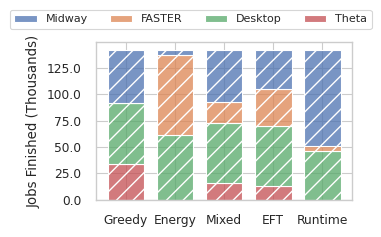

In [13]:
df = pd.read_csv("../outputs/set_of_endpoints_2_meggie_and_emmy_count_from_database_carbon.csv")
df.columns = df.columns.str.replace(' ', '')
df = df.sort_values(by='Job_end_time')
user_map = ["Greedy", "Energy", "EFT", "Unknown", "Unknown", "Theta", anon_name, "FASTER", "Mixed", "Runtime"]
df["user_name"] = df["User_id"].apply(lambda uid : user_map[uid])
df = df[df["user_name"] != "Unknown"]

endpoint_map = ["Theta", anon_name, "Desktop", "FASTER"]
df["endpoint_name"] = df["Selected_endpoint"].apply(lambda eid : endpoint_map[eid])
data = df[df["user_name"] != "Theta"]
data = data[data["user_name"] != "FASTER"]
data = data[data["user_name"] != anon_name]
data['user_name'] = pd.Categorical(data['user_name'], ['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'])

fig, ax = plt.subplots()
sns.histplot(data, x="user_name", hue="endpoint_name", multiple="stack", shrink=0.75, ax=ax)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.37, 1.05), ncol=4, title=None, fontsize=8)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (Thousands)")
labels = np.array([int(l.get_text()) for l in ax.get_yticklabels()]) / 1000
ax.set_yticklabels(labels)

for bar in ax.patches:
    bar.set_hatch("//")
    
plt.savefig("sim_job_distribution_cba.pdf")
plt.savefig("sim_job_distribution_cba_talk.png")